# GRIP Task #1 - Prediction of Student Percentage

## Dataset Outline
We are given a student data, with two attributes for this analysis - number of hours studied as the independent variable and percentage as the dependent variable. We are asked to predict the percentage of students by analysis the patterns with the number of hours. We have to, in this case find out the **predicted score or the percentage, if a student studies for 9.25 hours per day**. 

## Model used
We are using a **Supervisied Machine Learning Algorithm - Linear Regression**, for this prediction since the dependent variable is numeric in nature. And since we have just one independent variable, it is a **Simple Linear Regression model**. We will use the **scikit-learn** library in Jupyter notebook for this prediction analysis.

Let us load the _pyforest_ library just so we know we have all the needed Data Science libraries are always present in our work environment without having to remember any.

In [1]:
# pip install pyforest
# from pyforest import *

lazy_imports()

['import nltk',
 'import matplotlib as mpl',
 'import glob',
 'import sys',
 'from dask import dataframe as dd',
 'import seaborn as sns',
 'import keras',
 'import altair as alt',
 'import lightgbm as lgb',
 'import tqdm',
 'import os',
 'import xgboost as xgb',
 'import pickle',
 'import gensim',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pathlib import Path',
 'import dash',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import matplotlib.pyplot as plt',
 'import re',
 'import statistics',
 'import plotly.graph_objs as go',
 'import awswrangler as wr',
 'import pydot',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import bokeh',
 'from openpyxl import load_workbook',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.model_selection import train_test_split',
 'import datetime as dt',
 'from sklearn.ensemble import RandomFore

In [2]:
# Additional libraries we need for analysis:

from sklearn.model_selection import train_test_split   # Subsetting data
from sklearn.linear_model import LinearRegression      # Model building
from sklearn import metrics                            # Model evaluation

#### Let us look into the dataset we are provided with, the description of the independent and dependent (target) variables for analysis

## <center>Data Description</center>

<table>
    <tr>
        <td><b><center>Variable</center></b></td>
        <td><b><center>Definition</center></b></td>
    </tr>
    <tr>
        <td><center>Hours</center></td>
        <td>Number of hours the student studies (Independent variable - X)<td>
    </tr>
    <tr>
        <td><center>Scores</center></td>
        <td>The percentage of the student (Target variable - y)<td>
    </tr>
</table>

         
## TABLE OF CONTENTS:

* **A. Exploratory Data Analysis**
     1. Data Summary (EDD) & Inference
     2. Data Visualization: 
        _a. Distance plot & Inference_
        _b. Scatter plot & Inference_
        
        
* **B. Data Modelling**
     1. Data Splitting
     2. Model Creation & Interpretation
     3. Model Prediction & Prediction Comparison
     4. Score of student if study hours is 9.25/day


# A. Exploratory Data Analysis

Let us now get going with the student data loading and analysis. In this section, we will see a summary of the data, visualize them for insights and then consolidate our inferences from the same.

## 1. Data Summary (EDD)

We will see the data loading and the data summary in this part of exploratory analysis.

In [3]:
dsba1 = pd.read_csv("dsba_1 - Sheet1.csv")
print("Dataset loaded successfully")

<IPython.core.display.Javascript object>

Dataset loaded successfully


In [4]:
print("The top five entries of the Student Data: ")
dsba1.head()

The top five entries of the Student Data: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print("The bottom five entries of the Student Data: ")
dsba1.tail()

The bottom five entries of the Student Data: 


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
print("Shape of the dataset: ", dsba1.shape)

print("The dataset has 2 attributes and 25 entries in each attribute")

Shape of the dataset:  (25, 2)
The dataset has 2 attributes and 25 entries in each attribute


In [7]:
dsba1.info()

# The datatypes are float and integer for hours and scores respectively. But the scores column can take a float datatype as well. We can change the datatype to float if we want to, otherwise it is fine to continue this way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
print("Summary of the dataset:")

dsba1.describe()

Summary of the dataset:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Inference:

From the summary of the attributes, we can confirm that

* There are no missing values present in the dataset since the count is 25 for both attributes
* We can say that the data does not carry many outliers because the mean and median (50%) values are not far apart

## 2. Data Visualization 

In this part of the analysis, we will try to visualise the dataset using plots and graphs. We shall firstly do distribution charts and then a sctter plot to establish the relationship between the dependent and independent variables

### a. Distance plot:

Since being numeric data, let us first examine the distribution (histogram) of both the study hours and scores of the students separately to see the spread of the data. This will give us a picture of the spread or skewness of the variable, if there is any or help us ascertain if it is a normal distribution. We will make use of the **distplot** function from the **seaborn library** to do this.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

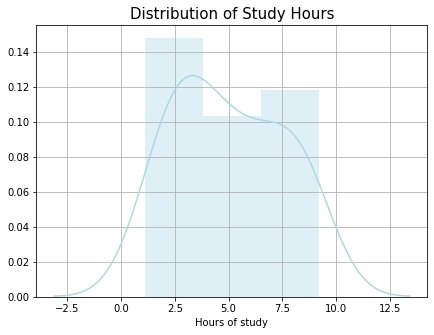

In [9]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(dsba1['Hours'], color = 'lightblue')
plt.title('Distribution of Study Hours', fontsize = 15)
plt.xlabel('Hours of study')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

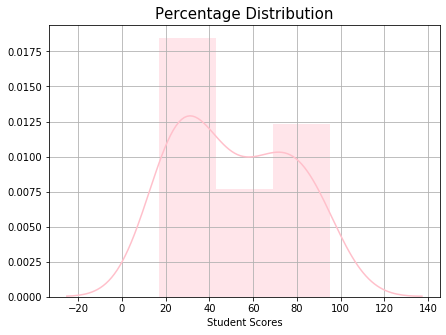

In [10]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(dsba1['Scores'], color = 'pink')
plt.title('Percentage Distribution', fontsize = 15)
plt.xlabel('Student Scores')
plt.grid()
plt.show()

### Inference:

* Both the attributes seem to be almost normally distributed. No identifiable skewness is seen
* We see extreme results - not many are average performers. More of low and high performers basis study hours.
* There is a higher peak and a dip in the percentage chart when compared to the first. Though just a thought, it might to an extent tell us that **maybe some students who put in more than 3.5 hours/day tend to not get more than 45%** 

### b. Scatter Plot:

We are now using the scatter plot to see the extent of relationship between the two variables, since we have already found out some similarities between them. We are also going to fit a **regression line** along with the scatter plot just to see the fit.
For this we use the **lmplot** that fits a linear regression line along with a **95% confidence interval** for that regression line.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

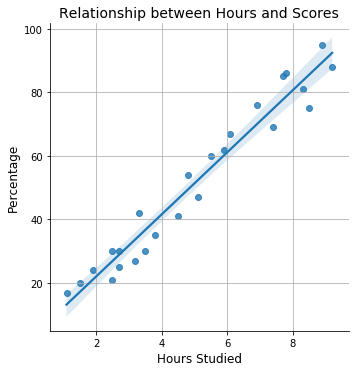

In [11]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.lmplot(x="Hours", y="Scores", data=dsba1)
plt.title('Relationship between Hours and Scores', fontsize=14)  
plt.xlabel('Hours Studied', fontsize=12)  
plt.ylabel('Percentage', fontsize=12)
plt.grid()
plt.show()

### Inference:

This plot shows that there is a **direct positive relationship** between the two variables, as an increase in the independent variables (Hours) brings a significant increase in the dependent variable (Scores). This scatter plot with the regression line has helped in better understanding the degree of relation between the variables.


# B. Data Modelling

We come to the next stage of the analysis, which is the data modeling. This involves the below steps:

* Data Splitting
* Model Fitting
* Model Evaluation


## 1. Data Splitting:

We start by splitting our dataset into **train and validation data** in order to effectively train and validate the model's performance. For this we use the **train_test_split** function from the scikit-learn library. By this, we can split the data into 4 subsets: training and validation dataset with X and y separately. 

In [12]:
X = dsba1.iloc[:, :-1].values  
y = dsba1.iloc[:, 1:].values 

The above function is used to fetch the values in the dataset for the X and y variables using the **index locator** which is the **iloc** function.

For X, we are using the default function to fetch data from all rows, with data including all columns except the **last column** (which is usually the dependent variable. So, this function by default helps **to fetch details from all rows till the second last column of the dataset**

Similarly for y, we want to fetch all the rows but only from column index 1 (second column per the dataset which is the **target variable**)

In [13]:
# DATA SPLITTING:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) 

In [14]:
# Viewing X_train
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
# Viewing y_train
y_train

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]], dtype=int64)

Let us now train our Linear Regression Algorithm on the X_train data. Evaluate its results on the X_val and then test the same on our y_train and y_val dataset.

## 2. Model Creation: 

Let us import the **LinearRegression** function from the scikit-learn library to fit the linear regression model to the dataset. We are fitting the model onto the X_train and y_train dataset

In [16]:
# LINEAR REGRESSION 

regr = LinearRegression()  
regr.fit(X_train, y_train) 

print("The data training is complete")

The data training is complete


Now that our model, regr is trained, let's have a quick view of the model scores, **coefficient and intercept** 

In [17]:
print("Coefficients: ", regr.coef_[0][0])
print("Intercept: ", regr.intercept_[0])

Coefficients:  9.910656480642237
Intercept:  2.018160041434683


### Model Interpretation 

From our model of the form **y = mX + c**,

m (coefficient) = 9.9107

c (intercept)   = 2.0182   

An increases in 1 unit of the independent variable (hour), increases the target variable by 9.9 units, meaning if a student increases his study hours by 1, his score goes up by 9.9% .
If X=0, our target variable y acquires the value of 2.02


## 3. Model Prediction:

Let us test the efficiency of the model's prediction on the validation set, X_val. Upon doing so, we will also compare the results with y_val as well. FOr that we will plot them together to find how close the prediction has been made.

In [18]:
# predicting y for the validation set:

predicy_y = regr.predict(X_val)

In [19]:
# Evaluating the accuracy using MAE metric:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, predicy_y))

Mean Absolute Error: 4.183859899002975


### Prediction comparison


In [20]:
compr = pd.DataFrame({'Actual': y_val.flatten(), 'Predicted': predicy_y.flatten()})
compr

<IPython.core.display.Javascript object>

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

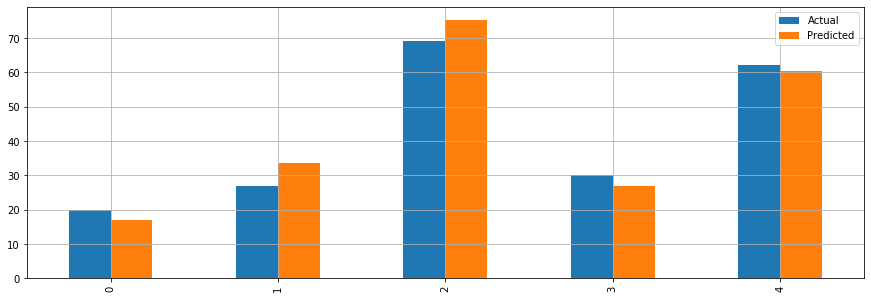

In [21]:
# Graphical representation

compr.plot(kind='bar')
plt.grid()
plt.show()

## 4. Score of student if study hours is 9.25/day:

We are asked to find out the students' score if he/she studies for 9.25 hours a day

In [22]:
hrs = [[9.25]]
pred_hrs = regr.predict(hrs)
print("No of Hours: ", hrs)
print("Predicted Score: ", pred_hrs[0])


No of Hours:  [[9.25]]
Predicted Score:  [93.69173249]


Let us try our hand at predicting the score for 9.5 hours and see the increase in score

In [23]:
# Testing for 9.5 hours of study

hrs2 = [[9.5]]
pred_hrs2 = regr.predict(hrs2)
print("No of Hours: ", hrs2)
print("Predicted Score: ", pred_hrs2[0])


No of Hours:  [[9.5]]
Predicted Score:  [96.16939661]


In [24]:
# difference of scores with 15 min increase in study:

diff = pred_hrs2-pred_hrs

print("Score increase with 15 minutes more study = ", diff[0])

# 2.47766412 * 4 = 9.91065648 (our coefficient)


Score increase with 15 minutes more study =  [2.47766412]


From this predictive analysis of the student scores data using simple linear regression, we were able to

* Visualise the **degree of relationship** between the independent and dependent variable
* Find out the **coefficient (m)** of the independent variable and the **intercept (c)** for prediction
* Evaluated the model's accuracy using **performance metric - MAE**
* **Predicted** the score of the student with 9.25 study hrs/day 
* Also tried out for 9.5 hours/day for testing


# <center>THE END</center>

<center>Project done by Sanju Hyacinth C</center>